# OCR com Python e Tesseract

# Reconhecimento de texto em imagens

## Instalando o Tesseract

Documentação: https://pypi.org/project/pytesseract/

In [1]:
!pip install Pillow==9.1.0 # necessário após atualização no módulo Pillow carregado pelo Colab
# Após executar, clique no botão [Restart Runtime] que vai aparecer no output dessa célula, logo abaixo. Em seguida, pode continuar executando normalmente o restante do código

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# !sudo apt install tesseract-ocr

In [3]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable


## Importando as bibliotecas

In [4]:
import pytesseract
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## Leitura da imagem

In [5]:
def plot_image(img, title = 'placeholder'):
    plt.figure(figsize=(8, 6))
    plt.imshow(img)  # Converte para RGB para exibição correta
    plt.title(title)
    plt.axis('off')  # Ocultar os eixos
    plt.show()

In [6]:
def subplot_images(img, rgb):
    # Configurar o plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Exibir a imagem original (BGR)
    ax[0].imshow(img)
    ax[0].set_title('Imagem Original (BGR)')
    ax[0].axis('off')  # Ocultar os eixos

    # Exibir a imagem RGB
    ax[1].imshow(rgb)
    ax[1].set_title('Imagem Convertida (RGB)')
    ax[1].axis('off')  # Ocultar os eixos

    plt.show()

In [7]:
# Carregar a imagem
img = cv2.imread('./assets/teste01.jpg')

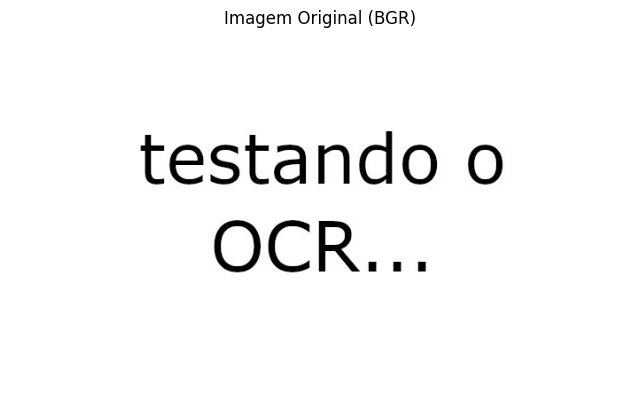

In [8]:
# Exibir a imagem original (BGR)
plot_image(img, 'Imagem Original (BGR)')

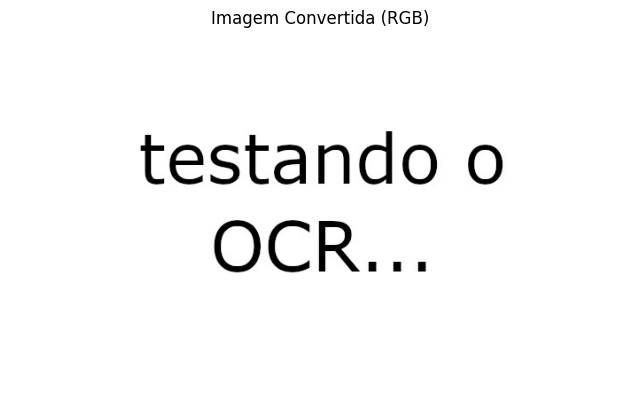

In [9]:
# Converter a imagem de BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibir a imagem RGB
plot_image(rgb,'Imagem Convertida (RGB)')

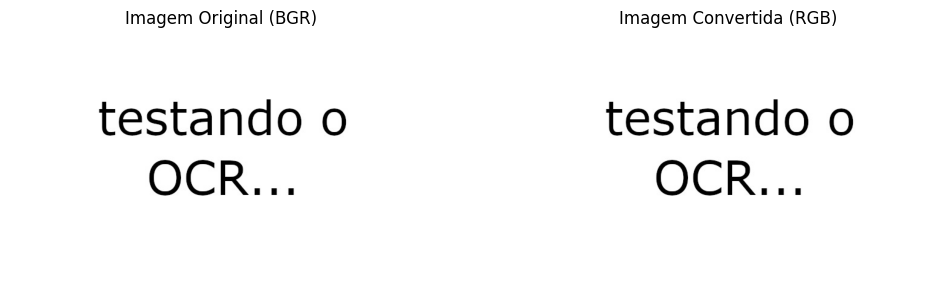

In [10]:
# Carregar a imagem
img = cv2.imread('./assets/teste01.jpg')

# Converter a imagem de BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Configurar o plot
subplot_images(img, rgb)


## Reconhecimento do Texto

Envia a imagem para o Pyteseract, transformado de imagem para texto

In [11]:
texto = pytesseract.image_to_string(rgb)

In [12]:
print(texto)

testando o
OCR...



## Suporte para outros idiomas (caracteres e símbolos)

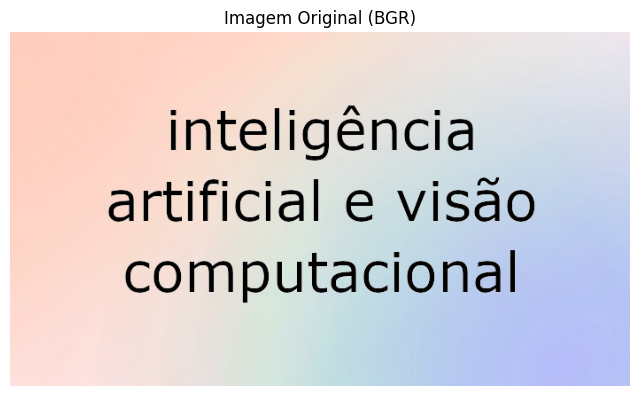

In [13]:
img = cv2.imread('./assets/teste02.jpg')

# Exibir a imagem original (BGR)
plot_image(img, 'Imagem Original (BGR)')

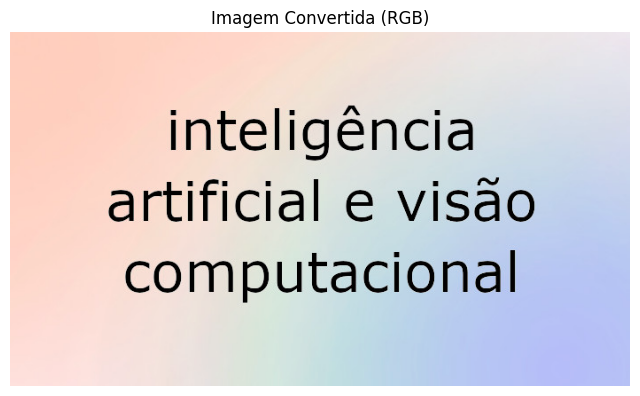

In [14]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image(img, 'Imagem Convertida (RGB)')

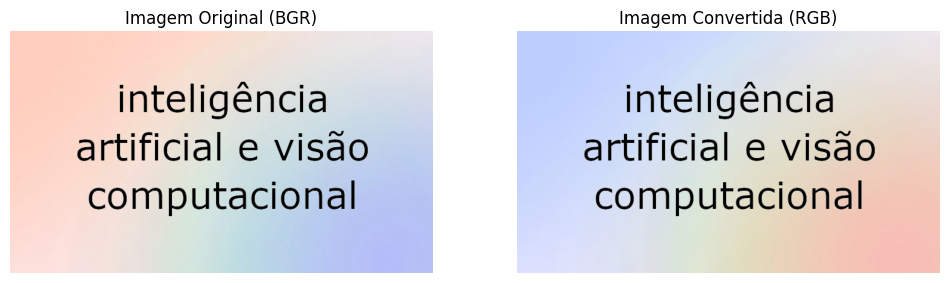

In [15]:
# Carregar a imagem
img = cv2.imread('./assets/teste02.jpg')

# Converter a imagem de BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir plots
subplot_images(img, rgb)

Envia a imagem para o Pyteseract, transformado de imagem para texto

In [16]:
texto = pytesseract.image_to_string(rgb)
print(texto)

inteligéncia
artificial e visao
computacional



### Instalação de outros idiomas com APT-GET

Listagem dos idiomas (OSD - Funções para detectar orientação do texto)

In [17]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Instalar os pacotes de Portugues !! [Procure os idiomas aqui](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html):

```
sudo apt install tesseract-ocr-por
```

In [18]:
# !sudo apt install tesseract-ocr-por

Listagem dos idiomas com o Português instalado

In [19]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


Envia a imagem para o Pyteseract, transformado de imagem para texto no idioma PORTUGUES (com seus simbolos e caracteres)

In [20]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



### Instalação de outros idiomas com TESSDATA

In [21]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Alguns meses após a publicação do curso, o link usado para baixar o arquivo por.traineddata sofreu uma pequena alteração.

Uma mudança recente no repositório oficial fez com que a URL do arquivo de tradução (https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true) fizesse um redirecionamento para outro endereço, no caso esse:  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata - Ou seja, ao acessar o link anterior ele automaticamente redireciona para esse novo link.

O problema é que quando ele faz esse redirecionamento não mantém o parâmetro ?raw=true, que é essencial para baixar o arquivo bruto. Sem esse parâmetro o wget faz o download do arquivo HTML da página no github, então se tentar passar esse arquivo pro Tesseract (ou qualquer outro arquivo inválido) vai exibir o seguinte erro:

  TesseractError: (1, 'Error opening data file tessdata/por.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'por\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')


Para evitar esse problema, precisamos trocar o "master"  por "main" no comando: !wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true

Ou seja, o comando final ficará assim:

!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Precisa fazer apenas essa alteração, o resto permanece o mesmo. Uma maneira de certificar que baixou o arquivo corretamente é verificar o tamanho dele, deve ter aproximadamente 14mb.

Não é necessária mais nenhuma mudança no código (isso até o momento, já que não é possível afirmar que no futuro não seja necessário fazer alguma outra mudança devido às novas versões por exemplo) mas se por um acaso tiver dúvidas ou dificuldades pode deixar sua dúvida no fórum que iremos te ajudar.

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

Instalação local do idioma Português

In [22]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-09-11 18:53:50--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-09-11 18:53:50--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-09-11 18:53:50--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, a

In [23]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



Instalação local do idioma Inglês

In [24]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-09-11 18:53:52--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata [following]
--2024-09-11 18:53:52--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2024-09-11 18:53:52--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, a

Visualização da pasta do TessData

In [25]:
!ls tessdata/

eng.traineddata  por.traineddata


## Modo de Segmentação de Página

### Page segmentation modes (PSM)

### Parâmetros de Orientação

Mostra os parâmetros para os modos de orientação de página

In [26]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


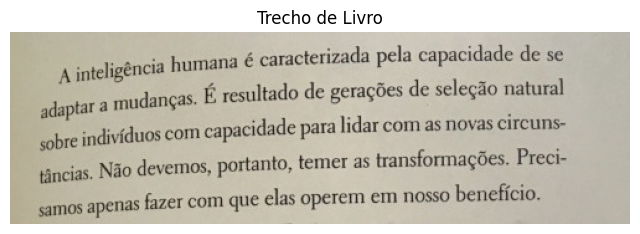

In [27]:
img = cv2.imread('./assets/trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plot_image(rgb, 'Trecho de Livro')

Adiciona-se no `config_tesseract` os parâmentros __-- psm 6__ 

6 -  Assume um único bloco uniforme de texto

In [28]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



Na configuração padrão, temos:

In [29]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



Adiciona-se no `config_tesseract` os parâmentros __-- psm 7__ 

7 -  Trata a imagem com um uníca linha

In [30]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââ%%ã%ãâêâã%%?ª%%ã



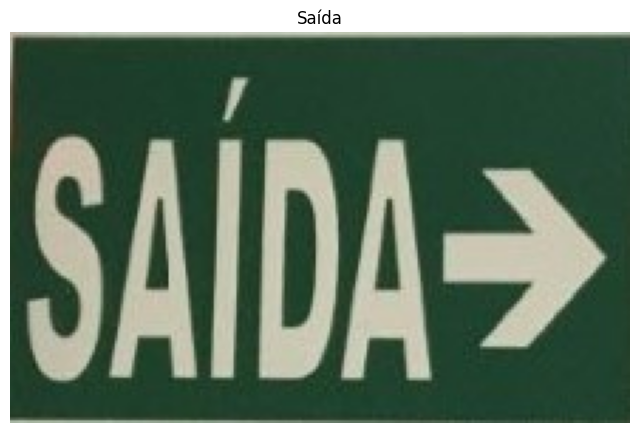

In [31]:
img = cv2.imread('./assets/saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image(rgb, 'Saída')

Envia a imagem para o Pyteseract, transformado de imagem para texto no idioma PORTUGUES com a orientação PSM 7

In [32]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



## Detecção de orientação da página

Importa as bibliotecas PIL e PLT

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

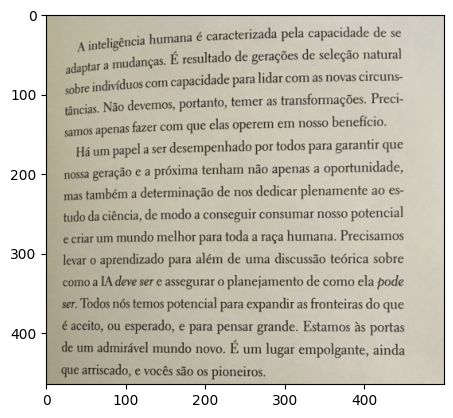

In [34]:
img = Image.open('./assets/livro01.jpg')
plt.imshow(img);

Conversão de imagem para OSD (Orientação da Página)

In [35]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



## Seleção de Textos

### Seleção de Textos - Parte 1



Importar biblioteca do Pytesseract

In [36]:
from pytesseract import Output

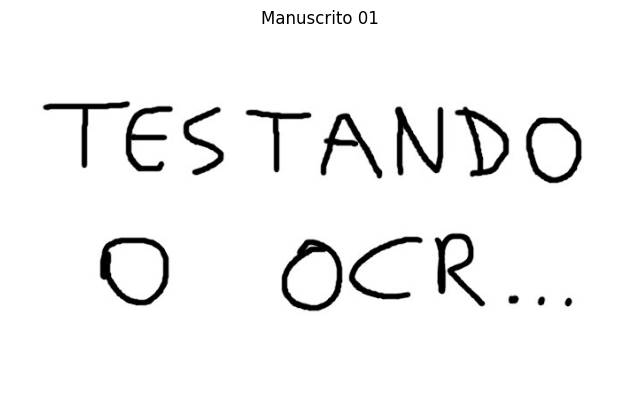

In [37]:
img = cv2.imread('./assets/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_image(rgb, 'Manuscrito 01')

O código a seguir utiliza a função `pytesseract.image_to_data` para realizar o reconhecimento óptico de caracteres (OCR) em uma imagem e retornar os dados em um formato estruturado:

`output_type=Output.DICT` : Especifica que a saída deve ser um dicionário contendo as informações extraídas, como texto, coordenadas e confiança.

In [38]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 90, -1, 74, 66],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

Definindo uma variável para a confiança mínima (min_conf = 40)

In [39]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

Ao passar a cor, lembre-se que a cor do OpenCV está em BGR (Blue, Green and Red)

In [40]:
def bounding_box(resultado, img, i, cor = (255, 100, 0)): # Bounding Box na Cor Azul
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 4)

  return x, y, img

### Seleção de Textos - Parte 2



In [41]:
def displayDetectedText(rgb, resultado):
  # Cópia da imagem original RGB para não alterar a imagem original durante o processamento
  img_copia = rgb.copy()

  # Itera sobre todos os elementos retornados pela função image_to_data
  for i in range(0, len(resultado['text'])):

    # Obtém a confiança de OCR para o texto atual e converte para inteiro
    confianca = int(resultado['conf'][i])

    # Verifica se a confiança é maior que o valor mínimo definido (min_conf)
    if confianca > min_conf:
      # Obtém as coordenadas da caixa delimitadora e a imagem atualizada
      x, y, img = bounding_box(resultado, img_copia, i)

      # Obtém o texto extraído para o bloco de texto atual
      texto = resultado['text'][i]
      
      # Desenha o texto na imagem copiada, acima da coordenada Y da caixa delimitadora
      # cv2.FONT_HERSHEY_SIMPLEX é o tipo de fonte, 1.1 é o tamanho da fonte, e (0,0,255) é a cor vermelha
      cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))

  # Plota a imagem copiada com o texto sobreposto
  plot_image(img_copia, 'Manuscrito 01')

displayDetectedText(rgb, resultado)

NameError: name 'i' is not defined

### Seleção de Textos - Parte 3

Importar e alteração da cor da imagem

In [52]:
img = cv2.imread('./assets/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Realiza o reconhecimento de caracteres (OCR) em uma imagem com informações úteis

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

In [ ]:
displayDetectedText(rgb, resultado)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
fonte = '/content/calibri.ttf'

In [ ]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

# Buscando informações específicas na imagem

In [ ]:
import re # regular expressions

In [ ]:
img = cv2.imread("tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

In [ ]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

In [ ]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [ ]:
datas

# Detecção de texto em cenários naturais

In [ ]:
img = cv2.imread("caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 11"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)
resultado

In [ ]:
min_conf = 50

In [ ]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

In [ ]:
resultado['conf']

In [ ]:
resultado['text']